# MOVIE SUCCESS ANALYSIS

### In today’s highly competitive entertainment industry, understanding the factors that influence a movie’s success is crucial for producers, marketers, and analysts. This project aims to analyze and predict movie performance using machine learning classification algorithms.

### Genre, Budget, Lead Actor Popularity, Marketing Spend, Director Rating, Social Media Buzz, Critic Score, Audience Score, and Awards Nominated. These features were carefully chosen as they play a significant role in determining a movie’s overall success.

### By leveraging multiple classification algorithms, this study identifies the most influential factors behind box office performance and provides insights to optimize decision-making in movie production and marketing

### I have selected this dataset because it offers a comprehensive view of elements affecting a movie’s outcome covering creative, financial, and promotional aspects. By analyzing these factors, the project provides data-driven insights that help filmmakers, studios, and analysts improve success rates and audience engagement strategies.

## Objectives:

#### Analyze key factors influencing movie success

#### Use machine learning to predict how well a movie will perform at the box office.

#### Test and compare different algorithms to find the best one.

#### Give useful suggestions to filmmakers and movie teams.

#### Help in making smart, data-based decisions for movie planning and marketing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("movie_classification.csv")
df

,Movie_Duration_Min,Genre,Budget_Million,IMDb_Rating,Language,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Franchise,Awards_Nominated,Target
0,168,Drama,211.5,6.4,English,24,80.7,91.6,7.6,91,6.7,4.6,No,9,Flop
1,179,Action,204.8,4.6,French,92,78.2,476.2,5.6,82,8.4,4.3,Yes,8,Hit
2,107,Comedy,94.7,6.1,Korean,73,36.2,92.3,5.8,41,8.8,6.9,No,4,Flop
3,141,Comedy,228.1,5.4,Korean,1,87.1,459.9,6.0,58,4.4,7.9,Yes,4,Hit
4,120,Thriller,45.2,3.2,Spanish,70,17.3,81.8,5.0,18,5.7,5.4,Yes,0,Flop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,173,Romance,87.4,3.2,French,70,33.4,121.2,4.9,61,5.0,5.7,No,7,Flop
1540,101,Drama,96.2,4.8,French,78,36.7,49.8,6.1,67,7.0,4.3,No,2,Flop
1541,125,Thriller,181.1,6.3,Hindi,35,69.1,149.6,4.8,10,5.3,8.5,No,6,Flop
1542,98,Thriller,251.9,9.2,French,3,96.2,233.7,9.4,23,4.3,8.7,No,7,Flop


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie_Duration_Min       1544 non-null   int64  
 1   Genre                    1544 non-null   object 
 2   Budget_Million           1544 non-null   float64
 3   IMDb_Rating              1544 non-null   float64
 4   Language                 1544 non-null   object 
 5   Lead_Actor_Popularity    1544 non-null   int64  
 6   Marketing_Spend_Million  1544 non-null   float64
 7   Box_Office_Million       1544 non-null   float64
 8   Director_Rating          1544 non-null   float64
 9   Social_Media_Buzz        1544 non-null   int64  
 10  Critic_Score             1544 non-null   float64
 11  Audience_Score           1544 non-null   float64
 12  Franchise                1544 non-null   object 
 13  Awards_Nominated         1544 non-null   int64  
 14  Target                  

## EDA

### 1)Divided data into x and y(x:Features and y:Target)

In [4]:
x=df.iloc[:,:-1]
y=df['Target']

In [5]:
#x should be in Dataframe means 2d array
x

,Movie_Duration_Min,Genre,Budget_Million,IMDb_Rating,Language,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Franchise,Awards_Nominated
0,168,Drama,211.5,6.4,English,24,80.7,91.6,7.6,91,6.7,4.6,No,9
1,179,Action,204.8,4.6,French,92,78.2,476.2,5.6,82,8.4,4.3,Yes,8
2,107,Comedy,94.7,6.1,Korean,73,36.2,92.3,5.8,41,8.8,6.9,No,4
3,141,Comedy,228.1,5.4,Korean,1,87.1,459.9,6.0,58,4.4,7.9,Yes,4
4,120,Thriller,45.2,3.2,Spanish,70,17.3,81.8,5.0,18,5.7,5.4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,173,Romance,87.4,3.2,French,70,33.4,121.2,4.9,61,5.0,5.7,No,7
1540,101,Drama,96.2,4.8,French,78,36.7,49.8,6.1,67,7.0,4.3,No,2
1541,125,Thriller,181.1,6.3,Hindi,35,69.1,149.6,4.8,10,5.3,8.5,No,6
1542,98,Thriller,251.9,9.2,French,3,96.2,233.7,9.4,23,4.3,8.7,No,7


In [6]:
#y should be in series means 1d array
y

0       Flop
1        Hit
2       Flop
3        Hit
4       Flop
        ... 
1539    Flop
1540    Flop
1541    Flop
1542    Flop
1543    Flop
Name: Target, Length: 1544, dtype: object

### check the value count

In [7]:
df['Target'].value_counts()

Target
Flop    772
Hit     772
Name: count, dtype: int64

### 2)Check Null Values

In [8]:
df.isnull().sum()

Movie_Duration_Min         0
Genre                      0
Budget_Million             0
IMDb_Rating                0
Language                   0
Lead_Actor_Popularity      0
Marketing_Spend_Million    0
Box_Office_Million         0
Director_Rating            0
Social_Media_Buzz          0
Critic_Score               0
Audience_Score             0
Franchise                  0
Awards_Nominated           0
Target                     0
dtype: int64

#### This data set does not content any null values

### 3)Remove Outliers

<Axes: xlabel='Target'>

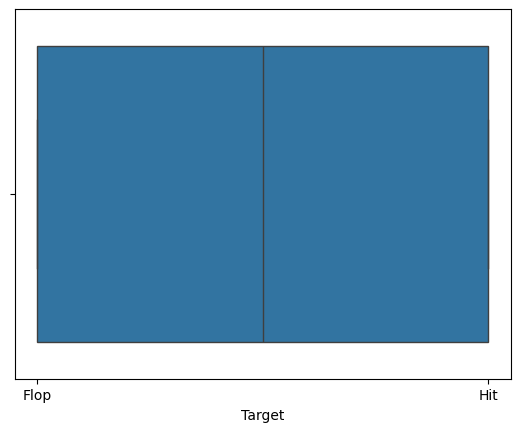

In [9]:
sns.boxplot(data=x,x=y)

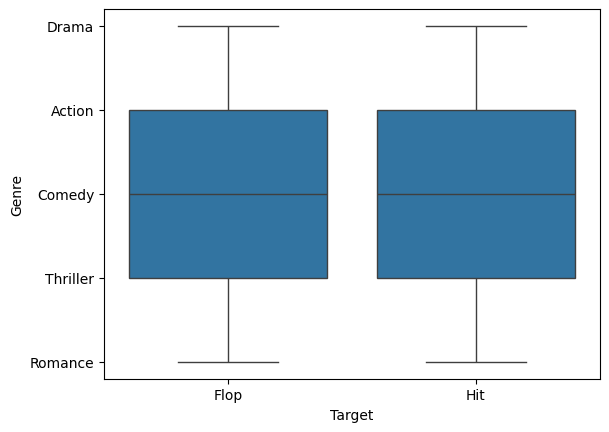

In [10]:
sns.boxplot(data=x,x=y,y='Genre')
plt.show()

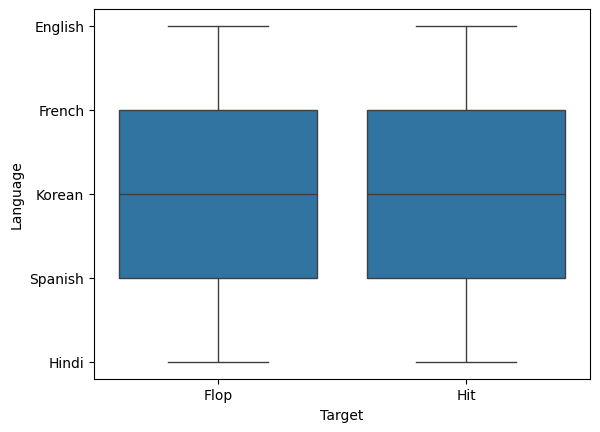

In [11]:
sns.boxplot(data=x,x=y,y='Language')
plt.show()

#### There are no outliers in my dataset

### 4)Cheaking Skewness and remove if any

In [12]:
x.describe()

,Movie_Duration_Min,Budget_Million,IMDb_Rating,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Awards_Nominated
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,129.255829,154.174806,6.303821,50.316710,58.860363,204.816710,6.672992,53.406736,6.668070,6.668718,4.431347
std,28.818402,85.810523,1.853645,28.046902,32.762769,164.193358,1.551827,26.056379,1.569549,1.597024,2.841084
min,80.000000,5.100000,3.000000,1.000000,1.900000,3.400000,4.000000,10.000000,4.000000,4.000000,0.000000
25%,103.000000,81.075000,4.700000,26.000000,30.975000,73.850000,5.400000,31.000000,5.300000,5.300000,2.000000
50%,128.000000,154.250000,6.400000,50.500000,58.900000,155.900000,6.700000,53.000000,6.600000,6.600000,4.000000
75%,155.000000,229.400000,7.900000,74.000000,87.600000,302.200000,8.000000,76.000000,8.000000,8.000000,7.000000
max,179.000000,300.000000,9.500000,99.000000,114.500000,725.800000,9.500000,99.000000,9.500000,9.500000,9.000000


In [13]:
from scipy.stats import skew

In [14]:
col=x.select_dtypes(['int64','float64']).columns

In [15]:
col

Index(['Movie_Duration_Min', 'Budget_Million', 'IMDb_Rating',
       'Lead_Actor_Popularity', 'Marketing_Spend_Million',
       'Box_Office_Million', 'Director_Rating', 'Social_Media_Buzz',
       'Critic_Score', 'Audience_Score', 'Awards_Nominated'],
      dtype='object')

In [16]:
x[col]

,Movie_Duration_Min,Budget_Million,IMDb_Rating,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Awards_Nominated
0,168,211.5,6.4,24,80.7,91.6,7.6,91,6.7,4.6,9
1,179,204.8,4.6,92,78.2,476.2,5.6,82,8.4,4.3,8
2,107,94.7,6.1,73,36.2,92.3,5.8,41,8.8,6.9,4
3,141,228.1,5.4,1,87.1,459.9,6.0,58,4.4,7.9,4
4,120,45.2,3.2,70,17.3,81.8,5.0,18,5.7,5.4,0
...,...,...,...,...,...,...,...,...,...,...,...
1539,173,87.4,3.2,70,33.4,121.2,4.9,61,5.0,5.7,7
1540,101,96.2,4.8,78,36.7,49.8,6.1,67,7.0,4.3,2
1541,125,181.1,6.3,35,69.1,149.6,4.8,10,5.3,8.5,6
1542,98,251.9,9.2,3,96.2,233.7,9.4,23,4.3,8.7,7


Movie_Duration_Min
0.02226100646571822


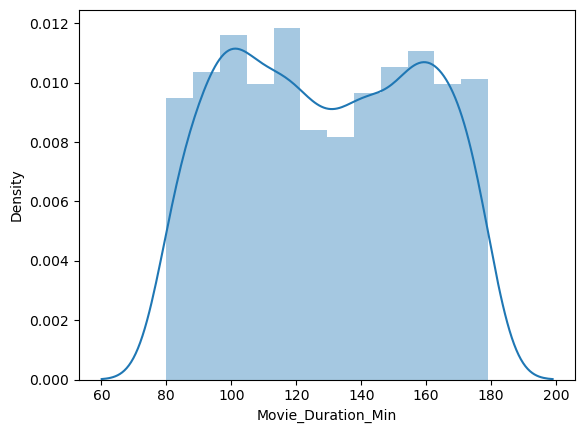

Budget_Million
-0.02053750527011554


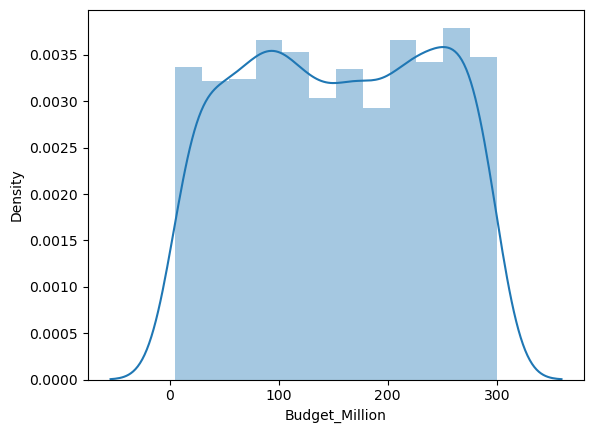

IMDb_Rating
-0.040642474764647905


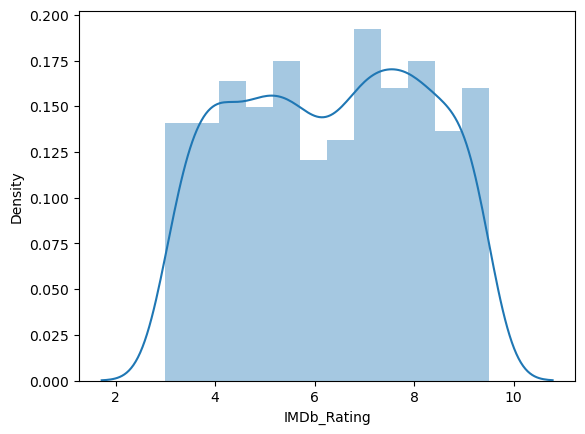

Lead_Actor_Popularity
-0.0074033075236636155


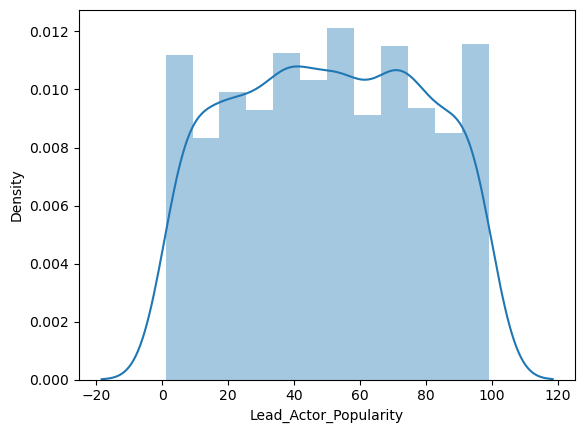

Marketing_Spend_Million
-0.020573936678567252


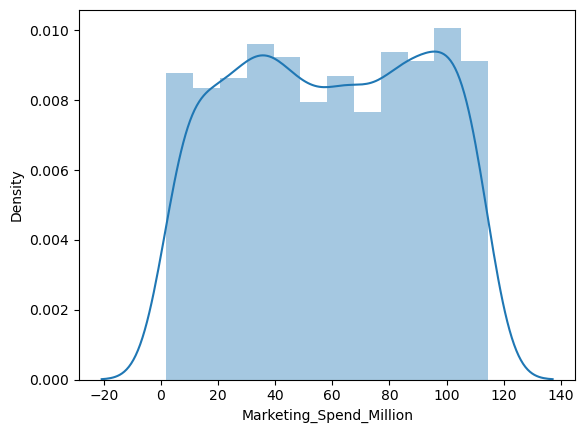

Box_Office_Million
0.9582128266843217


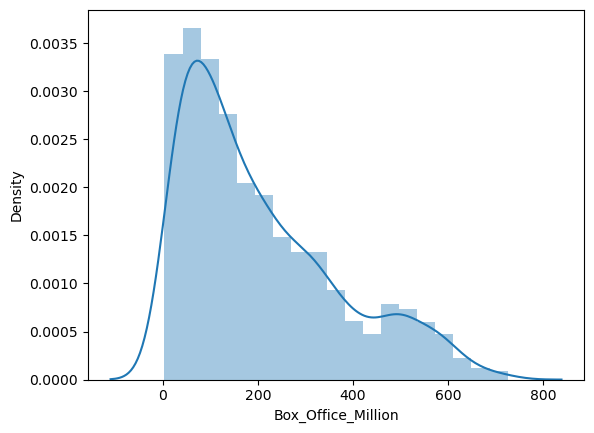

Director_Rating
0.07447137198233203


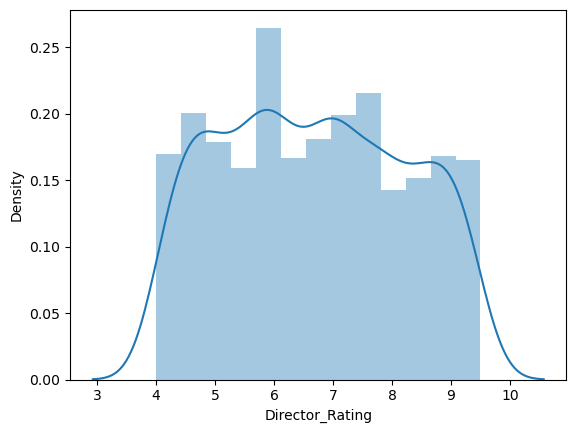

Social_Media_Buzz
0.035418522348494116


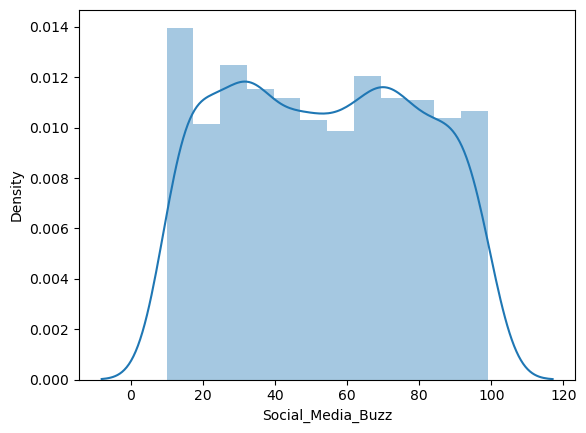

Critic_Score
0.09197101336815008


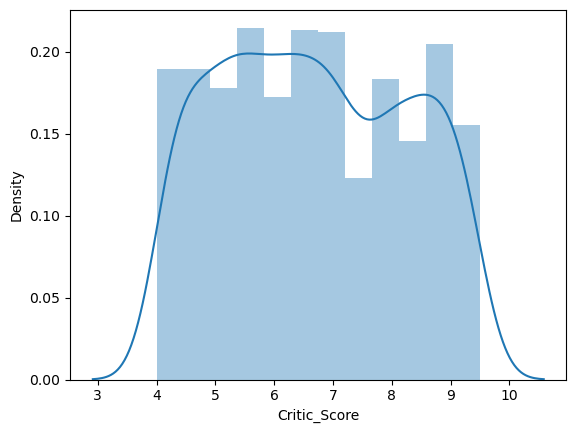

Audience_Score
0.10122318894650127


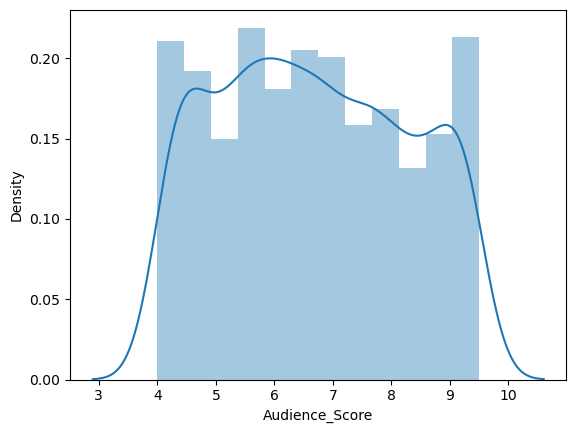

Awards_Nominated
0.04820440509464443


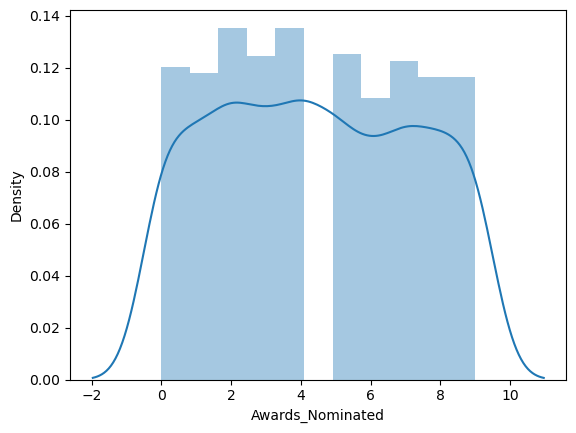

In [17]:
for i in x[col]:
    print(i)
    print(skew(x[i]))

    plt.figure()
    sns.distplot(x[i])
    plt.show()

In [18]:
#corelation
df.corr(numeric_only=True)

,Movie_Duration_Min,Budget_Million,IMDb_Rating,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Awards_Nominated
Movie_Duration_Min,1.000000,-0.039453,0.034691,-0.013943,-0.039449,-0.012949,-0.017380,-0.000826,-0.042143,0.033853,0.028461
Budget_Million,-0.039453,1.000000,0.032893,-0.020258,1.000000,0.704070,0.027323,0.039158,-0.047789,0.028707,-0.000345
IMDb_Rating,0.034691,0.032893,1.000000,-0.032847,0.032902,0.037206,0.012065,-0.018115,0.025864,0.030710,-0.048012
Lead_Actor_Popularity,-0.013943,-0.020258,-0.032847,1.000000,-0.020222,-0.035253,0.024989,-0.001015,-0.007040,0.006829,-0.018389
Marketing_Spend_Million,-0.039449,1.000000,0.032902,-0.020222,1.000000,0.704043,0.027328,0.039112,-0.047811,0.028685,-0.000328
Box_Office_Million,-0.012949,0.704070,0.037206,-0.035253,0.704043,1.000000,0.020823,0.022706,-0.040270,0.030740,-0.018400
Director_Rating,-0.017380,0.027323,0.012065,0.024989,0.027328,0.020823,1.000000,-0.009042,0.018926,0.013906,0.031602
Social_Media_Buzz,-0.000826,0.039158,-0.018115,-0.001015,0.039112,0.022706,-0.009042,1.000000,-0.037423,-0.009403,-0.003921
Critic_Score,-0.042143,-0.047789,0.025864,-0.007040,-0.047811,-0.040270,0.018926,-0.037423,1.000000,0.027923,-0.018405
Audience_Score,0.033853,0.028707,0.030710,0.006829,0.028685,0.030740,0.013906,-0.009403,0.027923,1.000000,-0.024677


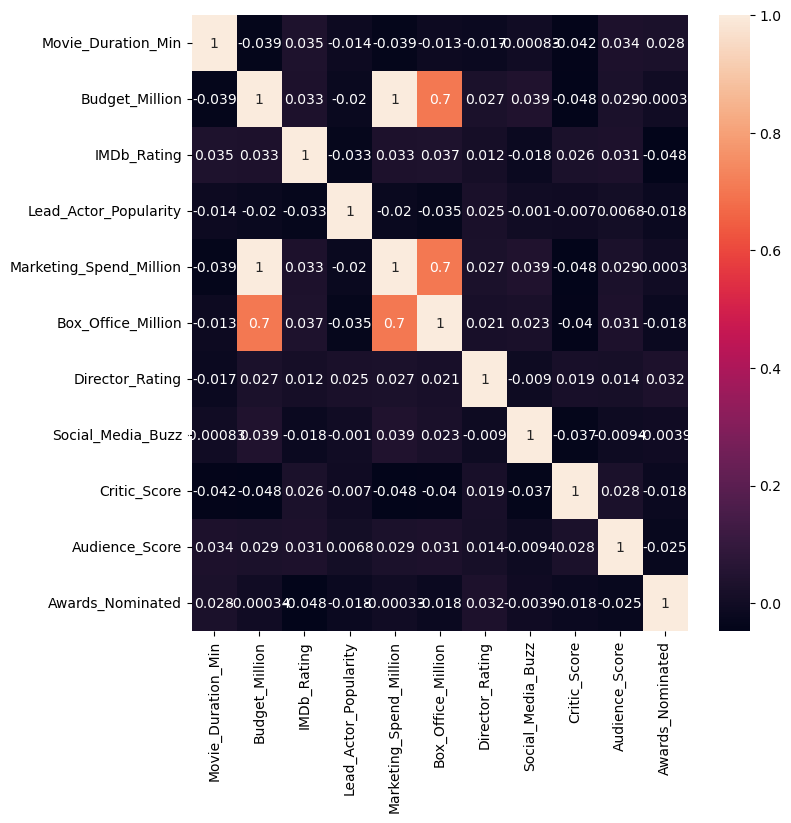

In [19]:
#Showing correlation by using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

### My data is equal distributet so I didn't remove skewness

## 5)Encoding

In [20]:
x

,Movie_Duration_Min,Genre,Budget_Million,IMDb_Rating,Language,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Franchise,Awards_Nominated
0,168,Drama,211.5,6.4,English,24,80.7,91.6,7.6,91,6.7,4.6,No,9
1,179,Action,204.8,4.6,French,92,78.2,476.2,5.6,82,8.4,4.3,Yes,8
2,107,Comedy,94.7,6.1,Korean,73,36.2,92.3,5.8,41,8.8,6.9,No,4
3,141,Comedy,228.1,5.4,Korean,1,87.1,459.9,6.0,58,4.4,7.9,Yes,4
4,120,Thriller,45.2,3.2,Spanish,70,17.3,81.8,5.0,18,5.7,5.4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,173,Romance,87.4,3.2,French,70,33.4,121.2,4.9,61,5.0,5.7,No,7
1540,101,Drama,96.2,4.8,French,78,36.7,49.8,6.1,67,7.0,4.3,No,2
1541,125,Thriller,181.1,6.3,Hindi,35,69.1,149.6,4.8,10,5.3,8.5,No,6
1542,98,Thriller,251.9,9.2,French,3,96.2,233.7,9.4,23,4.3,8.7,No,7


In [21]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [22]:
cat_col=x.select_dtypes(object).columns
cat_col

Index(['Genre', 'Language', 'Franchise'], dtype='object')

In [23]:
x[cat_col]

,Genre,Language,Franchise
0,Drama,English,No
1,Action,French,Yes
2,Comedy,Korean,No
3,Comedy,Korean,Yes
4,Thriller,Spanish,Yes
...,...,...,...
1539,Romance,French,No
1540,Drama,French,No
1541,Thriller,Hindi,No
1542,Thriller,French,No


In [24]:
x[cat_col]=oe.fit_transform(x[cat_col])

In [25]:
x

,Movie_Duration_Min,Genre,Budget_Million,IMDb_Rating,Language,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Franchise,Awards_Nominated
0,168,2.0,211.5,6.4,0.0,24,80.7,91.6,7.6,91,6.7,4.6,0.0,9
1,179,0.0,204.8,4.6,1.0,92,78.2,476.2,5.6,82,8.4,4.3,1.0,8
2,107,1.0,94.7,6.1,3.0,73,36.2,92.3,5.8,41,8.8,6.9,0.0,4
3,141,1.0,228.1,5.4,3.0,1,87.1,459.9,6.0,58,4.4,7.9,1.0,4
4,120,4.0,45.2,3.2,4.0,70,17.3,81.8,5.0,18,5.7,5.4,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,173,3.0,87.4,3.2,1.0,70,33.4,121.2,4.9,61,5.0,5.7,0.0,7
1540,101,2.0,96.2,4.8,1.0,78,36.7,49.8,6.1,67,7.0,4.3,0.0,2
1541,125,4.0,181.1,6.3,2.0,35,69.1,149.6,4.8,10,5.3,8.5,0.0,6
1542,98,4.0,251.9,9.2,1.0,3,96.2,233.7,9.4,23,4.3,8.7,0.0,7


### 7)Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x.iloc[:,:]=sc.fit_transform(x.iloc[:,:])

In [27]:
x

,Movie_Duration_Min,Genre,Budget_Million,IMDb_Rating,Language,Lead_Actor_Popularity,Marketing_Spend_Million,Box_Office_Million,Director_Rating,Social_Media_Buzz,Critic_Score,Audience_Score,Franchise,Awards_Nominated
0,1.344860,-0.035441,0.668260,0.051903,-1.427020,-0.938615,0.666815,-0.689756,0.597559,1.443234,0.020350,-1.295778,-1.010417,1.608588
1,1.726684,-1.475474,0.590156,-0.919471,-0.726664,1.486681,0.590484,1.653363,-0.691662,1.097717,1.103815,-1.483688,0.989690,1.256495
2,-0.772529,-0.755458,-0.693319,-0.109993,0.674047,0.809025,-0.691874,-0.685492,-0.562740,-0.476304,1.358748,0.144868,-1.010417,-0.151874
3,0.407655,-0.755458,0.861772,-0.487749,0.674047,-1.758935,0.862222,1.554058,-0.433818,0.176339,-1.445514,0.771235,0.989690,-0.151874
4,-0.321282,1.404592,-1.270358,-1.674985,1.374403,0.702026,-1.268935,-0.749461,-1.078428,-1.359291,-0.616982,-0.794684,0.989690,-1.560244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,1.518417,0.684575,-0.778418,-1.674985,-0.726664,0.702026,-0.777364,-0.509423,-1.142889,0.291511,-1.063115,-0.606773,-1.010417,0.904403
1540,-0.980796,-0.035441,-0.675833,-0.811541,-0.726664,0.987355,-0.676608,-0.944417,-0.369357,0.521856,0.211550,-1.483688,-1.010417,-0.856059
1541,-0.147725,1.404592,0.313877,-0.002062,-0.026309,-0.546288,0.312640,-0.336400,-1.207350,-1.666417,-0.871915,1.147056,-1.010417,0.552311
1542,-1.084930,1.404592,1.139218,1.562930,-0.726664,-1.687603,1.140066,0.175967,1.757857,-1.167337,-1.509247,1.272329,-1.010417,0.904403


### 8)Splitting into Training and Testing :

In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=42)

## Classification Algorithms :

### 1. KNN(K-Nearest Neighbour) Algorithm

### Modle Bulding

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

### Evaluate a Model

In [30]:
from sklearn.metrics import accuracy_score,classification_report 

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.70      0.75      0.73       146
         Hit       0.76      0.71      0.74       163

    accuracy                           0.73       309
   macro avg       0.73      0.73      0.73       309
weighted avg       0.73      0.73      0.73       309



### Hyper tunning with GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid={'n_neighbors':[3,5,7,9,11],'metric':['euclidean','manhattan','hamming','minkowski']}

In [34]:
gs=GridSearchCV(knn,param_grid)
gs.fit(xtrain,ytrain)
ypred=gs.predict(xtest)

In [35]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 11}

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain, ytrain)

ypred = knn.predict(xtest)

In [37]:
print(classification_report(ypred,ytest))

              precision    recall  f1-score   support

        Flop       0.77      0.72      0.75       157
         Hit       0.73      0.78      0.76       152

    accuracy                           0.75       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.75      0.75      0.75       309



### Conclusion:
The K-Nearest Neighbors (KNN) algorithm was used to classify the dataset, achieving an initial accuracy of 73%. To enhance the model's performance, hyperparameter tuning was conducted using GridSearchCV. By selecting the optimal parameters (gs.best_params_), the accuracy improved to 75%. This demonstrates the importance of fine-tuning hyperparameters to achieve better classification results.

### 2. Logistic Regression :

### MOdle Bulding

In [38]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)

### Evaluate a Model

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.77      0.77      0.77       146
         Hit       0.79      0.80      0.80       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



In [40]:
lreg = LogisticRegression(solver='sag')
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)
print("SAG Solver:\n", classification_report(ytest, ypred))

SAG Solver:
               precision    recall  f1-score   support

        Flop       0.77      0.77      0.77       146
         Hit       0.79      0.80      0.80       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



In [41]:
lreg = LogisticRegression(solver='saga')
lreg.fit(xtrain, ytrain)
ypred = lreg.predict(xtest)
print("SAGA Solver:\n", classification_report(ytest, ypred))

SAGA Solver:
               precision    recall  f1-score   support

        Flop       0.77      0.77      0.77       146
         Hit       0.79      0.80      0.80       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



In [42]:
lreg=LogisticRegression(solver='liblinear')
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.77      0.77      0.77       146
         Hit       0.79      0.80      0.80       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



In [43]:
lreg=LogisticRegression(solver='newton-cg')
lreg.fit(xtrain,ytrain)
ypred=lreg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.77      0.77      0.77       146
         Hit       0.79      0.80      0.80       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



### Conclusion :
The logistic regression model achieved a consistent accuracy of 78% across different solvers (default, liblinear,newton-cg,
sag, and saga), indicating stable performance and robustness.
    This suggests that the data is relatively simple, and the solver choice has minimal impact on accuracy.

### 3. Support Vector Machine (SVM)

In [44]:
from sklearn.svm import SVC
svc=SVC()

def mymodel(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))
    return m

In [45]:
mymodel(svc)

              precision    recall  f1-score   support

        Flop       0.81      0.84      0.83       146
         Hit       0.85      0.83      0.84       163

    accuracy                           0.83       309
   macro avg       0.83      0.84      0.83       309
weighted avg       0.84      0.83      0.84       309



SVC()

### Hypertuning of Kernel c and Gama

In [46]:
s1=SVC(kernel='linear')
mymodel(s1)

              precision    recall  f1-score   support

        Flop       0.78      0.77      0.78       146
         Hit       0.80      0.81      0.80       163

    accuracy                           0.79       309
   macro avg       0.79      0.79      0.79       309
weighted avg       0.79      0.79      0.79       309



SVC(kernel='linear')

In [47]:
s3=SVC(kernel='sigmoid')
mymodel(s3)

              precision    recall  f1-score   support

        Flop       0.77      0.72      0.74       146
         Hit       0.76      0.80      0.78       163

    accuracy                           0.76       309
   macro avg       0.76      0.76      0.76       309
weighted avg       0.76      0.76      0.76       309



SVC(kernel='sigmoid')

In [48]:
svc=SVC(kernel='poly')
mymodel(svc)

              precision    recall  f1-score   support

        Flop       0.74      0.82      0.78       146
         Hit       0.82      0.74      0.78       163

    accuracy                           0.78       309
   macro avg       0.78      0.78      0.78       309
weighted avg       0.78      0.78      0.78       309



SVC(kernel='poly')

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,10],'gamma':[1,10],'kernel':['rbf']}

In [50]:
gd=GridSearchCV(svc,param_grid,verbose=4)
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.538 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 1/5] END .........C=1, gamma=10, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .........C=1, gamma=10, kernel=rbf;, score=0.506 total time=   0.0s
[CV 3/5] END .........C=1, gamma=10, kernel=rbf;, score=0.506 total time=   0.0s
[CV 4/5] END .........C=1, gamma=10, kernel=rbf;, score=0.506 total time=   0.0s
[CV 5/5] END .........C=1, gamma=10, kernel=rbf;, score=0.510 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;,

In [51]:
gd.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

### Conclusion:
The Support Vector Machine achieve 83% accuracy. Again here done hypertune with kernel(linear,poly) for search better accuaacy but accuracy remains same.

### 4. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [53]:
mymodel(dt)

              precision    recall  f1-score   support

        Flop       0.82      0.88      0.85       146
         Hit       0.89      0.83      0.86       163

    accuracy                           0.85       309
   macro avg       0.85      0.86      0.85       309
weighted avg       0.86      0.85      0.85       309



DecisionTreeClassifier()

In [54]:
dt.score(xtrain,ytrain)

1.0

In [55]:
dt.score(xtest,ytest)

0.8543689320388349

### As train accuracy is more than testing accuracy,model is overfitted so apply PRUNING TECHNIQUE as follows
1.max_depth
2.min_sample_split
3.min_sample_leaf

### max_depth

In [56]:
for i in range(1,31):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max Depth={i} Accuracy={ac}")

Max Depth=1 Accuracy=0.6051779935275081
Max Depth=2 Accuracy=0.6051779935275081
Max Depth=3 Accuracy=0.7702265372168284
Max Depth=4 Accuracy=0.7993527508090615
Max Depth=5 Accuracy=0.8187702265372169
Max Depth=6 Accuracy=0.8511326860841424
Max Depth=7 Accuracy=0.8414239482200647
Max Depth=8 Accuracy=0.8576051779935275
Max Depth=9 Accuracy=0.8705501618122977
Max Depth=10 Accuracy=0.8446601941747572
Max Depth=11 Accuracy=0.8640776699029126
Max Depth=12 Accuracy=0.8705501618122977
Max Depth=13 Accuracy=0.8705501618122977
Max Depth=14 Accuracy=0.8705501618122977
Max Depth=15 Accuracy=0.8673139158576052
Max Depth=16 Accuracy=0.8511326860841424
Max Depth=17 Accuracy=0.8705501618122977
Max Depth=18 Accuracy=0.8640776699029126
Max Depth=19 Accuracy=0.8640776699029126
Max Depth=20 Accuracy=0.8737864077669902
Max Depth=21 Accuracy=0.8673139158576052
Max Depth=22 Accuracy=0.8640776699029126
Max Depth=23 Accuracy=0.8543689320388349
Max Depth=24 Accuracy=0.8770226537216829
Max Depth=25 Accuracy=0.8

In [57]:
dt2=DecisionTreeClassifier(max_depth=3)
mymodel(dt2)

              precision    recall  f1-score   support

        Flop       0.69      0.94      0.79       146
         Hit       0.92      0.62      0.74       163

    accuracy                           0.77       309
   macro avg       0.80      0.78      0.77       309
weighted avg       0.81      0.77      0.77       309



DecisionTreeClassifier(max_depth=3)

In [58]:
dt2.score(xtrain,ytrain)

0.7838056680161943

### min_samples_split

In [59]:
#Hypertuning with mean_samples_split
for i in range(2,30):
    dt1=DecisionTreeClassifier(min_samples_split=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=2 Accuracy=0.8543689320388349
min samples split=3 Accuracy=0.8511326860841424
min samples split=4 Accuracy=0.8543689320388349
min samples split=5 Accuracy=0.8543689320388349
min samples split=6 Accuracy=0.8511326860841424
min samples split=7 Accuracy=0.8543689320388349
min samples split=8 Accuracy=0.8543689320388349
min samples split=9 Accuracy=0.8478964401294499
min samples split=10 Accuracy=0.8511326860841424
min samples split=11 Accuracy=0.8478964401294499
min samples split=12 Accuracy=0.8511326860841424
min samples split=13 Accuracy=0.8543689320388349
min samples split=14 Accuracy=0.8543689320388349
min samples split=15 Accuracy=0.8543689320388349
min samples split=16 Accuracy=0.8543689320388349
min samples split=17 Accuracy=0.8478964401294499
min samples split=18 Accuracy=0.8478964401294499
min samples split=19 Accuracy=0.8446601941747572
min samples split=20 Accuracy=0.8446601941747572
min samples split=21 Accuracy=0.8414239482200647
min samples split=22 Accurac

In [60]:
dt3=DecisionTreeClassifier(min_samples_split=8)
mymodel(dt3)

              precision    recall  f1-score   support

        Flop       0.81      0.89      0.85       146
         Hit       0.89      0.82      0.85       163

    accuracy                           0.85       309
   macro avg       0.85      0.85      0.85       309
weighted avg       0.85      0.85      0.85       309



DecisionTreeClassifier(min_samples_split=8)

In [61]:
dt3.score(xtrain,ytrain)

0.9813765182186235

### min_samples_leaf

In [62]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(min_samples_leaf=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min samples split={i} Accuracy={ac}")

min samples split=1 Accuracy=0.8737864077669902
min samples split=2 Accuracy=0.8446601941747572
min samples split=3 Accuracy=0.8511326860841424
min samples split=4 Accuracy=0.8543689320388349
min samples split=5 Accuracy=0.8673139158576052
min samples split=6 Accuracy=0.86084142394822
min samples split=7 Accuracy=0.86084142394822
min samples split=8 Accuracy=0.86084142394822
min samples split=9 Accuracy=0.8770226537216829
min samples split=10 Accuracy=0.8802588996763754
min samples split=11 Accuracy=0.8867313915857605
min samples split=12 Accuracy=0.8770226537216829
min samples split=13 Accuracy=0.8640776699029126
min samples split=14 Accuracy=0.8673139158576052
min samples split=15 Accuracy=0.8511326860841424
min samples split=16 Accuracy=0.8446601941747572
min samples split=17 Accuracy=0.8446601941747572
min samples split=18 Accuracy=0.8446601941747572
min samples split=19 Accuracy=0.8446601941747572
min samples split=20 Accuracy=0.8317152103559871
min samples split=21 Accuracy=0.841

In [63]:
dt4=DecisionTreeClassifier(min_samples_leaf=14)
mymodel(dt4)

              precision    recall  f1-score   support

        Flop       0.82      0.92      0.87       146
         Hit       0.92      0.82      0.87       163

    accuracy                           0.87       309
   macro avg       0.87      0.87      0.87       309
weighted avg       0.87      0.87      0.87       309



DecisionTreeClassifier(min_samples_leaf=14)

In [64]:
dt4.score(xtrain,ytrain)

0.9230769230769231

### Conclusion :
The Decision Tree model initially achieved an accuracy of 85% without hyperparameter tuning. After applying hyperparameter tuning, various parameters were adjusted to optimize the model performance:

max_depth resulted in an accuracy of 77%,
min_samples_split improved the accuracy to 85%, and
min_samples_leaf yielded an accuracy of 87%.

These improvements indicate that hyperparameter tuning significantly enhanced the model's performance, with min_samples_split providing the best results. Therefore, tuning these parameters helps improve the model's ability to generalize and achieve better predictive accuracy.

### 5)Ensemble Learning

### 1.1)Bagging

In [65]:
from sklearn.ensemble import BaggingClassifier

In [66]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.76      0.76      0.76       146
         Hit       0.78      0.78      0.78       163

    accuracy                           0.77       309
   macro avg       0.77      0.77      0.77       309
weighted avg       0.77      0.77      0.77       309



In [67]:
bg=BaggingClassifier(KNeighborsClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.69      0.75      0.72       146
         Hit       0.76      0.69      0.72       163

    accuracy                           0.72       309
   macro avg       0.72      0.72      0.72       309
weighted avg       0.72      0.72      0.72       309



In [68]:
bg=BaggingClassifier(SVC())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.77      0.86      0.81       146
         Hit       0.86      0.77      0.81       163

    accuracy                           0.81       309
   macro avg       0.81      0.81      0.81       309
weighted avg       0.82      0.81      0.81       309



In [69]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.87      0.96      0.91       146
         Hit       0.96      0.87      0.91       163

    accuracy                           0.91       309
   macro avg       0.91      0.92      0.91       309
weighted avg       0.92      0.91      0.91       309



### Random Forest :

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.86      0.92      0.89       146
         Hit       0.92      0.87      0.90       163

    accuracy                           0.89       309
   macro avg       0.89      0.89      0.89       309
weighted avg       0.89      0.89      0.89       309



### Conclusion :
By applying Bagging from Ensemble Learning, the Logistic DecisionTreeClassifier outperforms other models with the best accuracy of 91%. This result highlights the effectiveness of ensemble methods in improving model performance. Bagging helps in reducing variance and overfitting, and in this case, the DecisionTreeClassifier benefits from this technique, delivering a more robust and reliable prediction compared to other classifiers tested.

### Voting

In [72]:
from sklearn.ensemble import VotingClassifier

In [73]:
model=[('LR',LogisticRegression()),('DT',DecisionTreeClassifier())]

In [74]:
vt=VotingClassifier(estimators=model)
vt.fit(xtrain,ytrain)
ypred=vt.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.74      0.93      0.82       146
         Hit       0.92      0.70      0.79       163

    accuracy                           0.81       309
   macro avg       0.83      0.82      0.81       309
weighted avg       0.83      0.81      0.81       309



### Boosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [76]:
ad=AdaBoostClassifier()

In [77]:
ad=AdaBoostClassifier()
ad.fit(xtrain,ytrain)
ypred=ad.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.83      0.83      0.83       146
         Hit       0.85      0.85      0.85       163

    accuracy                           0.84       309
   macro avg       0.84      0.84      0.84       309
weighted avg       0.84      0.84      0.84       309



In [78]:
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.93      0.97      0.95       146
         Hit       0.97      0.93      0.95       163

    accuracy                           0.95       309
   macro avg       0.95      0.95      0.95       309
weighted avg       0.95      0.95      0.95       309



### XGBoost

In [79]:
!pip install xgboost

In [80]:
from xgboost import XGBClassifier
xg=XGBClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Flop       0.93      0.97      0.95       146
         Hit       0.97      0.93      0.95       163

    accuracy                           0.95       309
   macro avg       0.95      0.95      0.95       309
weighted avg       0.95      0.95      0.95       309



### Conclusion :
AdaBoost achieved an accuracy of 84%, showing strong performance with better precision and recall for class 1.
Gradient Boosting also gave an accuracy of 95%, performing similarly to AdaBoost with balanced precision and recall.
XGBoost achieved an accuracy of 95%, slightly lower than the other two but still a competitive result.
In summary, xgboostt & Gradient Boosting provides the best performance among the boosting algorithms tested.

### 6. Naive Bay's

In [81]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import classification_report

In [82]:
ga=GaussianNB()
be=BernoulliNB()

In [83]:
def mymodel(m):
    m.fit(xtrain,ytrain)
    ypred=m.predict(xtest)
    print(classification_report(ytest,ypred))
    return m

In [84]:
mymodel(ga)

              precision    recall  f1-score   support

        Flop       0.70      0.80      0.75       146
         Hit       0.80      0.70      0.75       163

    accuracy                           0.75       309
   macro avg       0.75      0.75      0.75       309
weighted avg       0.75      0.75      0.75       309



GaussianNB()

In [85]:
mymodel(be)

              precision    recall  f1-score   support

        Flop       0.72      0.75      0.73       146
         Hit       0.76      0.74      0.75       163

    accuracy                           0.74       309
   macro avg       0.74      0.74      0.74       309
weighted avg       0.74      0.74      0.74       309



BernoulliNB()

### Conclusion
The Naïve Bayes classifier specifically implementing GaussianNB and BernoulliNB.Among them, GaussianNB achieved the highest accuracy of 75%

## Conclusion:

### The Movie Success Analysis project aimed to predict how well a movie would perform at the box office using different machine learning classification algorithms. The dataset included features like Budget, Genre, Lead Actor Popularity, Marketing Spend, Director Rating, Critic Score, and Audience Score.

### After testing various models, the highest accuracy of around 95% was achieved using algorithms such as XGBoost GradientBoosting . These models helped identify the most important factors that affect a movie’s success, such as strong direction, effective marketing, and audience response.

### The results show that data science can help filmmakers and production teams make better decisions about budget planning, casting, and promotions. This study proves how machine learning can be used to understand movie trends and predict outcomes more accurately. In the future, more features and advanced models can be added to further improve prediction accuracy.

## End Users

### The end users of this project include filmmakers, production houses, marketing teams, data analysts, and streaming platforms.

### Filmmakers and Production Houses can use the insights to plan budgets, choose cast and crew, and make better production decisions.

### Data Analysts and Researchers can study which factors most affect a movie’s success and improve future models.

### Streaming Platforms and Distributors can identify which movies are more likely to perform well for acquisition and promotion.

### Overall, this project helps the film industry make smarter, data-based decisions to improve movie success and audience reach.